In [1]:
import os
import docx
import PyPDF2
import io
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import pdfplumber
import pikepdf

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anilg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anilg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Function to extract text from resume
def get_text(filename):
    full_text = ''
    if filename.endswith('.docx'):
        doc = docx.Document(filename)
        for para in doc.paragraphs:
            full_text = full_text + para.text
    elif filename.endswith('.pdf'):  
        with open(filename, "rb") as pdf_file:
            pdoc = PyPDF2.PdfReader(filename)
            number_of_pages = len(pdoc.pages)
            page = pdoc.pages[0]
            page_content = page.extract_text()
        for paragraph in page_content:
            full_text =  full_text + paragraph
    else:
        try:
            import aspose.words as aw
            output = aw.Document()
            output.remove_all_children()
            input = aw.Document(filename)
            output.append_document(input, aw.ImportFormatMode.KEEP_SOURCE_FORMATTING)
            output.save("Output.docx");
            doc = docx.Document('Output.docx')
            for para in doc.paragraphs:
                full_text = full_text + para.text
            full_text = full_text[79:]
        except:
            filename.endswith(".zip")
    return (full_text)

In [3]:
# Define key terms dictionary for fixing Role Applied for 
terms = {
    'WorkDay ERP': ['workday', 'workday consultant', 'workday hcm', 'eib', 'picof',
                    'workday studio', 'nnbound/outbound integrations'],
    'Peoplesoft': ['peoplesoft', 'pia', 'ccb', 'birt', 'peci', 'ccw', 'pum', 'people tools',
                   'peoplesoft implementation', 'peoplesoft components',
                   'peoplesoft dba', 'peoplesoft admin', 'peoplesoft admin/dba', 'peopleSoft fscm',
                   'peopletoolsupgrade', 'peopletools upgrade', 'process scheduler servers',
                   'peoplesoft hrms', 'peopleSoft consultant', 'peoplesoft cloud',
                   'PeopleSoft migrations', 'eoplesoft Testing Framework', 'pure internet architecture'],
    'Database Developer': ['sql', 'sql server', 'ms sql server', 'msbi', 'sql developer', 'ssis', 'ssrs',
                           'ssms', 't-sql', 'tsql', 'Razorsql', 'razor sql', 'triggers', 'powerbi', 'power bi',
                           'oracle sql', 'pl/sql', 'pl\sql', 'oracle', 'oracle 11g', 'oledb', 'cte', 'ddl',
                           'dml', 'etl', 'mariadb', 'maria db'],
    'Java Developer': ['reactjs', 'react js', 'react js developer', 'html', 'React JS'
                        'css3', 'xml', 'javascript', 'html5', 'boostrap', 'jquery', 'redux', 'php', 'node js',
                        'nodejs', 'apache', 'netbeans', 'nestjs', 'nest js', 'react developer', 'react hooks',
                        'jenkins']
}
# List of all key terms to indicate skillset. Include all the key words in the list
all_terms = ['workday', 'hcm', 'eib', 'picof', 'workday hcm',
             'workday studio', 'nnbound/outbound integrations',
             'peoplesoft', 'pia', 'ccb', 'birt', 'peci', 'ccw', 'pum', 'people tools',
             'peoplesoft implementation', 'peoplesoft components',
             'peoplesoft dba', 'peoplesoft admin', 'peoplesoft admin/dba', 'peopleSoft fscm',
             'peopletoolsupgrade', 'peopletools upgrade', 'process scheduler servers',
             'peoplesoft hrms', 'peopleSoft consultant', 'peopledoft cloud',
             'PeopleSoft migrations', 'eoplesoft Testing Framework', 'pure internet architecture',
             'sql', 'sql server', 'ms sql server', 'msbi', 'sql developer', 'ssis', 'ssrs',
             'ssms', 't-sql', 'tsql', 'Razorsql', 'razor sql', 'triggers', 'powerbi', 'power bi',
             'oracle sql', 'pl/sql', 'pl\sql', 'oracle', 'oracle 11g', 'oledb', 'cte', 'ddl',
             'dml', 'etl', 'mariadb', 'maria db', 'reactjs', 'react js', 'react js developer', 'html',
             'css3', 'xml', 'javascript', 'html5', 'boostrap', 'jquery', 'redux', 'php', 'node js',
             'nodejs', 'apache', 'netbeans', 'nestjs', 'nest js', 'react developer', 'react hooks',
             'jenkins']

# Rest of your code...


In [4]:
# Function to remove punctuation and tokenize the text
def token_text(ext_text):
    punc = '''!()-[]{};:'"\,.<>/?@#$%^&*_~'''
    punc_text = " "
    for ele in ext_text:
        if ele in punc:
            punc_text = ext_text.replace(ele, "")
    stop_words = set(stopwords.words('english'))
    punc_text.split()
    word_tokens = word_tokenize(punc_text)
    tokenized_text = [w for w in word_tokens if not w.lower() in stop_words]
    tokenized_text = []
    for w in word_tokens:
        if w not in stop_words:
            tokenized_text.append(w)
    return(tokenized_text)

In [5]:

# Function to read the tokenized text and search for the key words to determine the Role Applied for
def role_applied(text):
    for i in range(len(text)):
        text[i] = text[i].lower()
    
    for area in terms.keys():
        if area == 'WorkDay ERP':
            for word in terms[area]:
                if any(word in token for token in text):
                    role = area
                    return role
                
        elif area == 'Peoplesoft':
            for word in terms[area]:
                if any(word in token for token in text):
                    role = area
                    return role   
                
        elif area == 'Database Developer':
            for word in terms[area]:
                if any(word in token for token in text):
                    role = area
                    return role
            
        elif area == 'Java Developer':
            for word in terms[area]:
                if any(word in token for token in text):
                    role = area
                    return role
    else:
        role = "Fresher"
        return role

In [6]:
# Function to extract Name and contact details
def contact_details(text):
    name = ''  
    for i in range(min(3, len(text))):
        name = " ".join([name, text[i]])
    return name


In [7]:
# Function to extract experience details
def extract_experience(text):
    global sent
    text = text.split()
    for i in range(len(text)-2):
        text[i].lower()
        if text[i] == 'years':
            sent = text[i-2] + ' ' + text[i-1] + ' ' + text[i] + ' ' + text[i+1] + ' ' + text[i+2]
            return sent

In [8]:
# Function to extract skill set details
def extract_skill_set(text):
    t = []
    for i in range(len(text)):
        if text[i] in all_terms:
            if text[i] in t:
                continue
            t.append(text[i]) 
    return t


In [9]:
# Create an empty Data Frame ResumeText with two columns
ResumeText = pd.DataFrame([], columns=['Name', 'RoleApplied', 'Experience', 'SkillSet', 'TextInfo'])


In [10]:

# Mention the path in your computer where resumes folder is stored
path = r'C:\Users\anilg\Downloads\Resumes\Resumes\Resumes'

# Search the directory path and loop through the resume documents
for filename in os.listdir(path):
    filename = os.path.join(path, filename)
    ext_text = get_text(filename)
    tok_text = token_text(ext_text)
    role = role_applied(tok_text)
    name = contact_details(tok_text)
    experience = extract_experience(ext_text)
    skills = extract_skill_set(tok_text)
    
    # Create a new row for the DataFrame
    new_row = [name, role, experience, skills, tok_text]  
    ResumeText.loc[len(ResumeText)] = new_row


In [11]:
ResumeText.head(80)


,Name,RoleApplied,Experience,SkillSet,TextInfo
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, e...","[anil, kumar, maddukuri, sql, &, msbi, develop..."
1,aradhana tripathi current,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathi, current, location, :, gac..."
2,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, objective, :, have, 21..."
3,chinna subbarayudu mdob,WorkDay ERP,around 5.1 years of IT,"[workday, hcm, etl, eib, xml, ccw, picof, peci...","[chinna, subbarayudu, mdob, 06thmarch, 1994nat..."
4,,Fresher,None,[],[]
...,...,...,...,...,...
75,kumar ssworkday |,WorkDay ERP,Summary:Having 6+ years of experience,"[hcm, workday, eib, xml, peci, peoplesoft]","[kumar, ssworkday, |, hcm, |, fcmworkday, cons..."
76,,Fresher,None,[],[]
77,,Fresher,None,[],[]
78,vinay kumar v,WorkDay ERP,Having 4.2 years of Total,"[workday, hcm, eib, xml, peoplesoft]","[vinay, kumar, v, workday, functional, consult..."


In [12]:
ResumeText.shape


(80, 5)

In [13]:
pd.set_option('display.max_rows', None)


In [14]:
ResumeText['Experience'].str.extract("(\d+(?:\.\d+)?)")


,0
0,2.4
1,4
2,2.11
3,5.1
4,NaN
5,3
6,NaN
7,NaN
8,NaN
9,2


In [15]:
ResumeText[ResumeText['RoleApplied'].isna()]


,Name,RoleApplied,Experience,SkillSet,TextInfo


In [16]:
ResumeText[ResumeText['Name'].isna()]


,Name,RoleApplied,Experience,SkillSet,TextInfo


In [17]:
ResumeText[ResumeText['SkillSet'].isna()]


,Name,RoleApplied,Experience,SkillSet,TextInfo


In [18]:
ResumeText[ResumeText['TextInfo'].isna()]


,Name,RoleApplied,Experience,SkillSet,TextInfo


In [19]:
ResumeText['RoleApplied'].value_counts()


RoleApplied
Fresher               27
Peoplesoft            21
Database Developer    15
WorkDay ERP           11
Java Developer         6
Name: count, dtype: int64

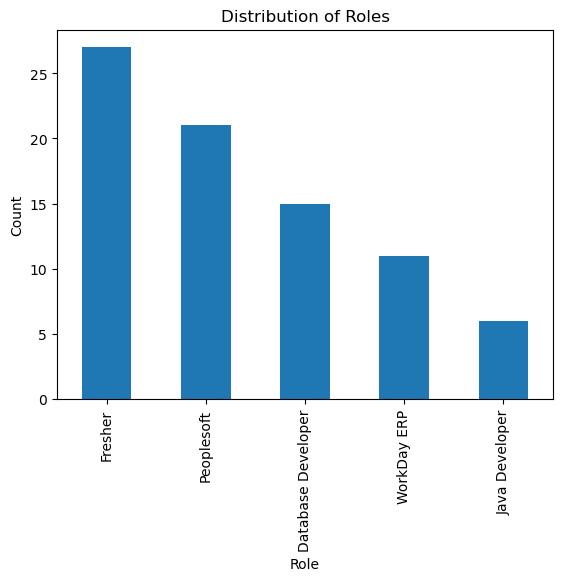

In [20]:
import matplotlib.pyplot as plt

# Count the occurrences of each role
role_counts = ResumeText['RoleApplied'].value_counts()

# Plot a bar chart
role_counts.plot(kind='bar')
plt.title('Distribution of Roles')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()


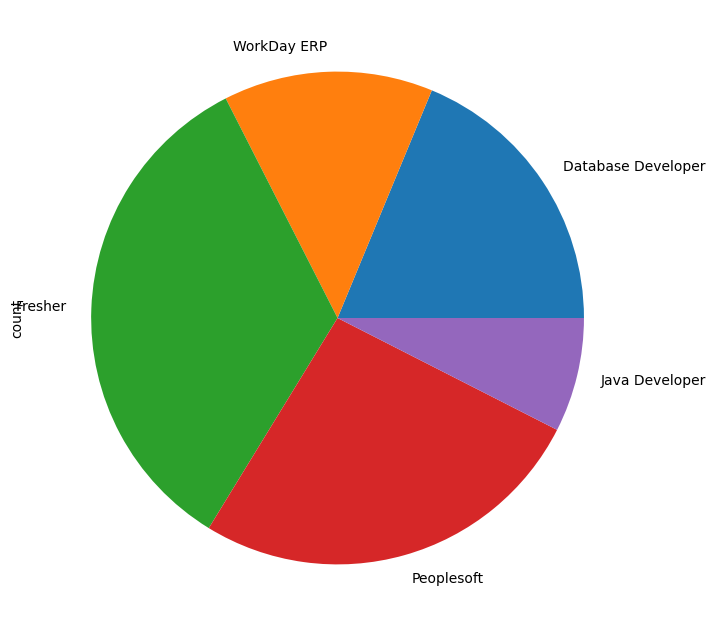

In [21]:
plt.figure(figsize=(10, 8))
ResumeText['RoleApplied'].value_counts(sort=False).plot.pie()
plt.show()


In [22]:
empty_series = pd.isnull(ResumeText["RoleApplied"])
ResumeText[empty_series]


,Name,RoleApplied,Experience,SkillSet,TextInfo


In [23]:
empty_series = pd.isnull(ResumeText['Experience'])
ResumeText[empty_series]


,Name,RoleApplied,Experience,SkillSet,TextInfo
4,,Fresher,None,[],[]
6,,Fresher,None,[],[]
7,,Fresher,None,[],[]
8,,Fresher,None,[],[]
10,ravali p curriculum,Peoplesoft,None,[sql],"[ravali, p, curriculum, vitae, specialization,..."
11,susovan bag seeking,Database Developer,None,"[html, sql]","[susovan, bag, seeking, challenging, position,..."
12,,Fresher,None,[],[]
15,,Fresher,None,[],[]
17,,Fresher,None,[],[]
18,,Fresher,None,[],[]


In [24]:
java_developer = (ResumeText["RoleApplied"] == "Java Developer")
ResumeText[java_developer]


,Name,RoleApplied,Experience,SkillSet,TextInfo
51,kamalakar reddy .,Java Developer,● 3 years of experience,"[html5, css3, javascript, redux, html, reactjs...","[kamalakar, reddy, ., a, linked, in, https//ww..."
54,pragnya pattnaik expertise,Java Developer,around 2 years of experience,"[html5, css3, javascript, jquery]","[pragnya, pattnaik, expertise, :, having, arou..."
58,ui-developer/ react js,Java Developer,all 3.2 years of Extensive,"[html, xml, javascript, redux, html5, css3, no...","[ui-developer/, react, js, developer, name, :,..."
59,ui-developer/ react js,Java Developer,all 3.2 years of Extensive,"[html, xml, javascript, redux, html5, css3, no...","[ui-developer/, react, js, developer, name, :,..."
67,page | 1,Java Developer,● 2.4+ years of Professional,"[html, reactjs]","[page, |, 1, name, :, m, prabakaran, title, :,..."
70,shaik abdul sharuk,Java Developer,SHARUK 2 years of Experience,"[html5, css3, javascript, redux]","[shaik, abdul, sharuk, 2, years, experience, w..."


In [25]:
ResumeText


,Name,RoleApplied,Experience,SkillSet,TextInfo
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, e...","[anil, kumar, maddukuri, sql, &, msbi, develop..."
1,aradhana tripathi current,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathi, current, location, :, gac..."
2,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, objective, :, have, 21..."
3,chinna subbarayudu mdob,WorkDay ERP,around 5.1 years of IT,"[workday, hcm, etl, eib, xml, ccw, picof, peci...","[chinna, subbarayudu, mdob, 06thmarch, 1994nat..."
4,,Fresher,None,[],[]
5,gopi krishna reddy,WorkDay ERP,with 3+ years as Workday,"[workday, hcm, eib, picof, xml, birt]","[gopi, krishna, reddy, professional, summery, ..."
6,,Fresher,None,[],[]
7,,Fresher,None,[],[]
8,,Fresher,None,[],[]
9,g himaja career,WorkDay ERP,include 2+ years as workday,"[workday, hcm, eib, html, birt]","[g, himaja, career, objectiveto, work, towards..."


In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

lb = preprocessing.LabelEncoder()
ResumeText['Roleapplied'] = lb.fit_transform(ResumeText['RoleApplied'])
ResumeText['Text'] = ResumeText['TextInfo'].apply(lambda x: ','.join(map(str, x)))
ResumeText


,Name,RoleApplied,Experience,SkillSet,TextInfo,Roleapplied,Text
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, e...","[anil, kumar, maddukuri, sql, &, msbi, develop...",0,"anil,kumar,maddukuri,sql,&,msbi,developer,summ..."
1,aradhana tripathi current,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathi, current, location, :, gac...",0,"aradhana,tripathi,current,location,:,gachibowl..."
2,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, objective, :, have, 21...",0,"buddha,vamsi,career,objective,:,have,211,years..."
3,chinna subbarayudu mdob,WorkDay ERP,around 5.1 years of IT,"[workday, hcm, etl, eib, xml, ccw, picof, peci...","[chinna, subbarayudu, mdob, 06thmarch, 1994nat...",4,"chinna,subbarayudu,mdob,06thmarch,1994national..."
4,,Fresher,None,[],[],1,
5,gopi krishna reddy,WorkDay ERP,with 3+ years as Workday,"[workday, hcm, eib, picof, xml, birt]","[gopi, krishna, reddy, professional, summery, ...",4,"gopi,krishna,reddy,professional,summery,:,work..."
6,,Fresher,None,[],[],1,
7,,Fresher,None,[],[],1,
8,,Fresher,None,[],[],1,
9,g himaja career,WorkDay ERP,include 2+ years as workday,"[workday, hcm, eib, html, birt]","[g, himaja, career, objectiveto, work, towards...",4,"g,himaja,career,objectiveto,work,towards,achie..."


In [27]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
import re

ps = PorterStemmer()
stopwords = set(stopwords.words("english"))

def preprocess(word_list):
    text = " ".join(word_list)
    text = re.sub('[^a-zA-Z ]', ' ', text)
    text = text.lower()
    text = text.split()  
    text = [word for word in text if word not in stopwords]  
    text = [ps.stem(word) for word in text] 
    text = " ".join(text)
    return text

ResumeText['Text'] = ResumeText['TextInfo'].apply(preprocess)
ResumeText.head()


,Name,RoleApplied,Experience,SkillSet,TextInfo,Roleapplied,Text
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, e...","[anil, kumar, maddukuri, sql, &, msbi, develop...",0,anil kumar maddukuri sql msbi develop summari ...
1,aradhana tripathi current,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathi, current, location, :, gac...",0,aradhana tripathi current locat gachibowli hyd...
2,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, objective, :, have, 21...",0,buddha vamsi career object year experi databas...
3,chinna subbarayudu mdob,WorkDay ERP,around 5.1 years of IT,"[workday, hcm, etl, eib, xml, ccw, picof, peci...","[chinna, subbarayudu, mdob, 06thmarch, 1994nat...",4,chinna subbarayudu mdob thmarch nation indian ...
4,,Fresher,None,[],[],1,


In [28]:
ResumeText.TextInfo = ResumeText.TextInfo.apply(lambda x: [ps.stem(word) for word in x])
ResumeText.head()


,Name,RoleApplied,Experience,SkillSet,TextInfo,Roleapplied,Text
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, e...","[anil, kumar, maddukuri, sql, &, msbi, develop...",0,anil kumar maddukuri sql msbi develop summari ...
1,aradhana tripathi current,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathi, current, locat, :, gachib...",0,aradhana tripathi current locat gachibowli hyd...
2,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, object, :, have, 211, ...",0,buddha vamsi career object year experi databas...
3,chinna subbarayudu mdob,WorkDay ERP,around 5.1 years of IT,"[workday, hcm, etl, eib, xml, ccw, picof, peci...","[chinna, subbarayudu, mdob, 06thmarch, 1994nat...",4,chinna subbarayudu mdob thmarch nation indian ...
4,,Fresher,None,[],[],1,


In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

lb = preprocessing.LabelEncoder()
ResumeText['role'] = lb.fit_transform(ResumeText['RoleApplied'])

# Drop multiple columns at once
df = ResumeText.drop(["Name", "RoleApplied", "Experience", "TextInfo"], axis=1)

df.head()


,SkillSet,Roleapplied,Text,role
0,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, e...",0,anil kumar maddukuri sql msbi develop summari ...,0
1,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]",0,aradhana tripathi current locat gachibowli hyd...,0
2,"[sql, oracle, triggers, cte, etl]",0,buddha vamsi career object year experi databas...,0
3,"[workday, hcm, etl, eib, xml, ccw, picof, peci...",4,chinna subbarayudu mdob thmarch nation indian ...,4
4,[],1,,1


In [30]:
df['SkillSet'] = df['SkillSet'].apply(lambda x: ','.join(map(str, x)))
df.head()


,SkillSet,Roleapplied,Text,role
0,"sql,msbi,ssms,ssis,ssrs,triggers,cte,etl,oledb",0,anil kumar maddukuri sql msbi develop summari ...,0
1,"sql,mariadb,triggers,ddl,dml,t-sql,ssms",0,aradhana tripathi current locat gachibowli hyd...,0
2,"sql,oracle,triggers,cte,etl",0,buddha vamsi career object year experi databas...,0
3,"workday,hcm,etl,eib,xml,ccw,picof,peci,peoples...",4,chinna subbarayudu mdob thmarch nation indian ...,4
4,,1,,1


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

stop_words = set(stopwords.words("english"))
ps = PorterStemmer()

def preprocess(word_list):
    text = " ".join(word_list)
    text = re.sub('[^a-zA-Z ]', ' ', text)
    text = text.lower()
    text = text.split()  
    text = [word for word in text if word not in stop_words]  
    text = [ps.stem(word) for word in text] 
    text = " ".join(text)
    return text

ResumeText['Text'] = ResumeText['TextInfo'].apply(preprocess)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ResumeText['Text'], ResumeText['RoleApplied'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a k-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
predictions_test = knn_classifier.predict(X_test_tfidf)

# Predictions on the training set
predictions_train = knn_classifier.predict(X_train_tfidf)

# Evaluating the model on test set
print("Classification Report on Test Set:")
print(classification_report(y_test, predictions_test, zero_division=1))
print("Accuracy on Test Set:", accuracy_score(y_test, predictions_test))

# Evaluate the model on training set
print("\nClassification Report on Training Set:")
print(classification_report(y_train, predictions_train, zero_division=1))
print("Accuracy on Training Set:", accuracy_score(y_train, predictions_train))


Classification Report on Test Set:
                    precision    recall  f1-score   support

Database Developer       1.00      0.00      0.00         1
           Fresher       0.38      1.00      0.55         6
    Java Developer       1.00      0.00      0.00         2
        Peoplesoft       1.00      0.00      0.00         7

          accuracy                           0.38        16
         macro avg       0.84      0.25      0.14        16
      weighted avg       0.77      0.38      0.20        16

Accuracy on Test Set: 0.375

Classification Report on Training Set:
                    precision    recall  f1-score   support

Database Developer       1.00      0.00      0.00        14
           Fresher       0.34      1.00      0.51        21
    Java Developer       1.00      0.00      0.00         4
        Peoplesoft       1.00      0.00      0.00        14
       WorkDay ERP       1.00      0.27      0.43        11

          accuracy                           0.38   

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['role'], test_size=0.3, random_state=123)

# Creating a pipeline with TF-IDF and Multinomial Naive Bayes
model = Pipeline([
    ('tfidf', TfidfVectorizer(sublinear_tf=True, stop_words='english')),
    ('clf', MultinomialNB())
])

# Train the model
model.fit(X_train, y_train)

# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Print classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, test_pred, zero_division=1))

# Calculate and print accuracy on training and testing sets
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Accuracy on Training Set: {train_accuracy:.4f}")
print(f"Accuracy on Test Set: {test_accuracy:.4f}")


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      1.00         4
           1       1.00      1.00      1.00         8
           2       1.00      0.00      0.00         2
           3       0.40      0.67      0.50         6
           4       1.00      1.00      1.00         4

    accuracy                           0.67        24
   macro avg       0.68      0.53      0.70        24
weighted avg       0.68      0.67      0.79        24

Accuracy on Training Set: 0.9286
Accuracy on Test Set: 0.6667


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['role'], test_size=0.3, random_state=123)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predictions on the test set
pred = svm_model.predict(X_test_tfidf)

# Print classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, pred, zero_division=1))

# Calculate and print accuracy on the test set
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       1.00      1.00      1.00         8
           2       1.00      0.00      0.00         2
           3       0.44      0.67      0.53         6
           4       1.00      1.00      1.00         4

    accuracy                           0.71        24
   macro avg       0.76      0.58      0.56        24
weighted avg       0.75      0.71      0.68        24

Accuracy on Test Set: 0.7083


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


df['Text'] = df['Text'].fillna('')
X = df['Text']
y = df['role']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Model 1: Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train_encoded)
rf_predictions = rf_classifier.predict(X_test_tfidf)
print("Random Forest Classifier:")
print(classification_report(y_test_encoded, rf_predictions,zero_division=1))

# Model 2: Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_tfidf, y_train_encoded)
gb_predictions = gb_classifier.predict(X_test_tfidf)
print("\nGradient Boosting Classifier:")
print(classification_report(y_test_encoded, gb_predictions,zero_division=1))

# Model 3: Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train_encoded)
svm_predictions = svm_classifier.predict(X_test_tfidf)
print("\nSupport Vector Machine (SVM):")
print(classification_report(y_test_encoded, svm_predictions,zero_division=1))

# Model 4: Neural Network (MLPClassifier)
nn_classifier = MLPClassifier(max_iter=500)
nn_classifier.fit(X_train_tfidf, y_train_encoded)
nn_predictions = nn_classifier.predict(X_test_tfidf)
print("\nNeural Network (MLPClassifier):")
print(classification_report(y_test_encoded, nn_predictions,zero_division=1))



Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       1.00      1.00      1.00         9
           2       1.00      0.50      0.67         2
           3       0.17      1.00      0.29         1
           4       1.00      0.80      0.89         5

    accuracy                           0.75        20
   macro avg       0.83      0.66      0.57        20
weighted avg       0.96      0.75      0.75        20


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         9
           2       1.00      0.50      0.67         2
           3       0.50      1.00      0.67         1
           4       0.71      1.00      0.83         5

    accuracy                           0.85        20
   macro avg       0.84      0.77      0.73        20
weighted avg       0